# Predicting House Prices in São Paulo
**Weld Lucas Cunha**

## Overview

Welcome to my notebook! <br/>
In this notebook, we'll apply different Machine Learning techniques to predict the sales price of apartments in São Paulo-Brazil. <br/>
The chosen data is the "Sao Paulo Real Estate - Sale / Rent - April 2019" dataset, available at https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019.

![sao paulo](../imgs/sao_paulo.jpg)

## Importing Modules and Reading the Dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from geopy.geocoders import Nominatim

from sklearn import linear_model
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.svm import SVR

plt.rcParams.update({'font.size': 12})
np.random.seed(42)

In [2]:
# Reading the dataset file
filepath = '../data/sao-paulo-properties-april-2019.csv'

df = pd.read_csv(filepath)
df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


In [3]:
# Taking a look at some data samples
df.sample(20)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
9932,4000,1800,125,4,3,1,1,1,0,0,0,Jardim Paulista/São Paulo,rent,apartment,-23.561234,-46.662591
7481,398850,600,63,2,2,1,1,1,0,1,0,Saúde/São Paulo,sale,apartment,-23.619827,-46.607533
3289,1300,580,44,2,1,0,1,0,0,0,0,Vila Prudente/São Paulo,rent,apartment,-23.579361,-46.592176
13073,189000,0,40,2,1,0,1,0,0,1,0,São Mateus/São Paulo,sale,apartment,-23.611443,-46.459974
8272,169002,150,44,2,1,0,1,0,0,0,0,Brás/São Paulo,sale,apartment,-23.545690,-46.618203
8530,1811498,0,160,2,2,1,2,0,0,1,0,Santa Cecília/São Paulo,sale,apartment,-23.537947,-46.652422
2910,1400,575,56,2,1,0,1,0,0,1,0,Água Rasa/São Paulo,rent,apartment,-23.565362,-46.567656
7042,920000,1211,180,3,3,1,2,1,1,1,0,Cidade Dutra/São Paulo,sale,apartment,-23.714221,-46.704675
2337,1950,465,65,2,2,1,1,1,0,1,0,Brás/São Paulo,rent,apartment,0.000000,0.000000
6876,890000,1070,91,3,2,1,2,1,1,1,0,Cambuci/São Paulo,sale,apartment,-23.571133,-46.626032


Each instance of this dataset represents one single apartment. The following features are available:
- Price: Target value, the rental/sales price of the apartment in Reais (numerical)
- Condo: Monthly Payment value for the condominium in Reais (numerical)
- Size: Area of the apartment in m² (numerical)
- Rooms: Number of rooms (numerical)
- Toilets: Number of toilets (numerical)
- Suites: Number of suites (numerical)
- Parking: The number of parking spots available (numerical)
- Elevator: Elevator availability (boolean)
- Furnished: Furniture availability (boolean)
- Swimming Pool: Existence of swimming poil at the condominium (boolean)
- New: If the is brand new or not (boolean)
- District: District where the apartmaent is located (categorical)
- Negotiation Type: Type of negotiation available for the apartment (categorical)
- Property Type: The classification of the property (house, apartment, etc) (categorical)
- Latitude: latitude position value (numerical)
- Longitude: longitude position value (numerical)

In [4]:
# Exploring column types and the presence of null values per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

Null values were not found.

In [5]:
# Basic statistics for the numerical columns
df_description = df.describe().transpose()
df_description

,count,mean,std,min,25%,50%,75%,max
Price,13640.0,287737.784311,590821.416924,480.000000,1858.750000,8100.000000,360000.00000,10000000.0
Condo,13640.0,689.882331,757.649363,0.000000,290.000000,500.000000,835.00000,9500.0
Size,13640.0,84.373900,58.435676,30.000000,50.000000,65.000000,94.00000,880.0
Rooms,13640.0,2.312023,0.777461,1.000000,2.000000,2.000000,3.00000,10.0
Toilets,13640.0,2.073680,0.961803,1.000000,2.000000,2.000000,2.00000,8.0
Suites,13640.0,0.980792,0.834891,0.000000,1.000000,1.000000,1.00000,6.0
Parking,13640.0,1.393182,0.829932,0.000000,1.000000,1.000000,2.00000,9.0
Elevator,13640.0,0.354179,0.478281,0.000000,0.000000,0.000000,1.00000,1.0
Furnished,13640.0,0.146774,0.353894,0.000000,0.000000,0.000000,0.00000,1.0
Swimming Pool,13640.0,0.512170,0.499870,0.000000,0.000000,1.000000,1.00000,1.0


## Exploratory Data Analysis

In [6]:
num_features  = list(df_description.index)
cat_features = list(df.columns[~np.isin(df.columns, num_features)])

print('Numeric/Boolean Features:', num_features)
print('Categoric Features:', cat_features)

Numeric/Boolean Features: ['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'New', 'Latitude', 'Longitude']
Categoric Features: ['District', 'Negotiation Type', 'Property Type']


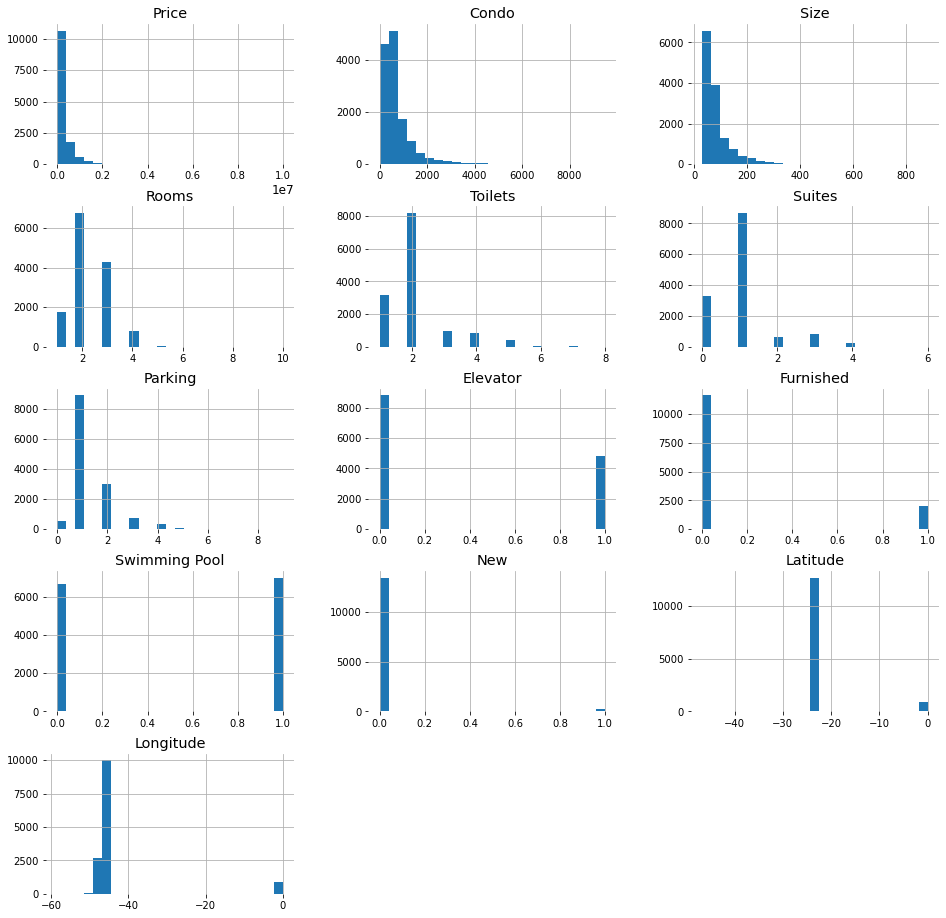

In [7]:
# Numeric/Boolean Features distribution:
df_tmp = df[num_features]
h = df_tmp.hist(bins=25, figsize=(16, 16), xlabelsize='10', ylabelsize='10', layout=(5, 3))
sns.despine(left=True, bottom=True)

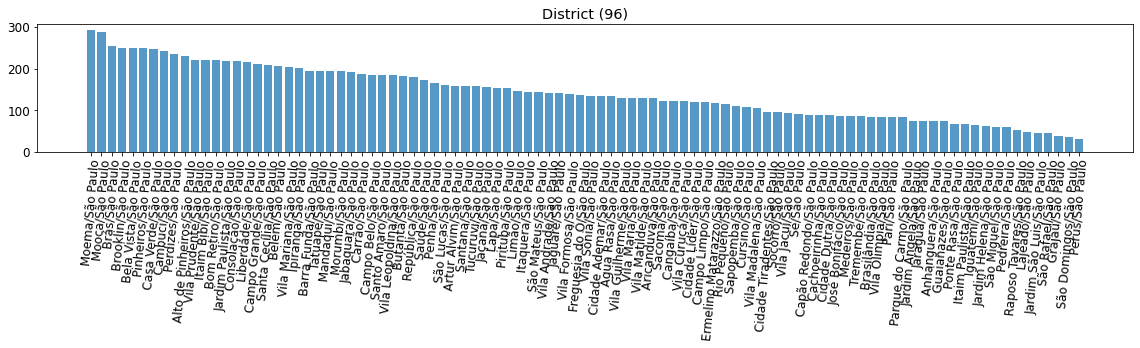

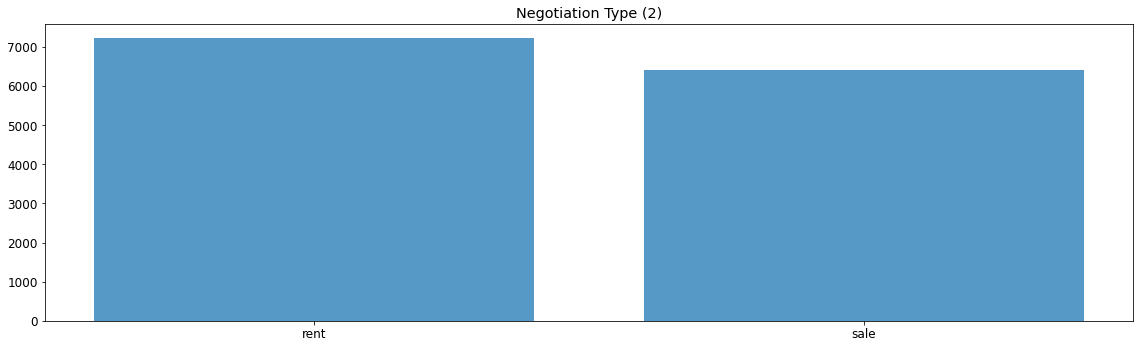

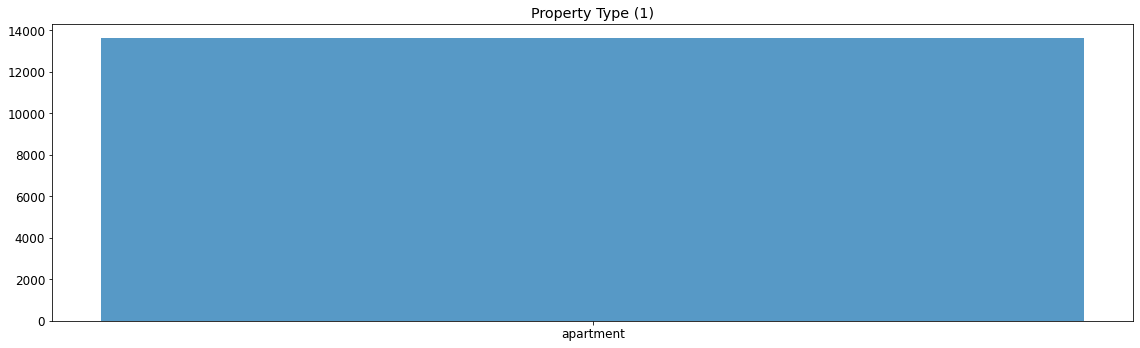

In [8]:
# Categoric features distribution
for i,feat in enumerate(cat_features):
    plt.figure(figsize=(16, 5))
    df_counts = pd.value_counts(df[feat])
    plt.title(f'{feat} ({df_counts.shape[0]})')
    x_ticks = np.arange(0, df_counts.shape[0], 1)
    plt.bar(x_ticks, df_counts.values, alpha=0.75)
    if df_counts.shape[0] > 5:
        plt.xticks(x_ticks, df_counts.index, rotation=85)
    else:
        plt.xticks(x_ticks, df_counts.index)
    plt.tight_layout()
    plt.show()

We can observe that all properties are apartments, approximately 7000 apartments are for rent and 6000 apartments are for sale in 96 different districts of São Paulo.

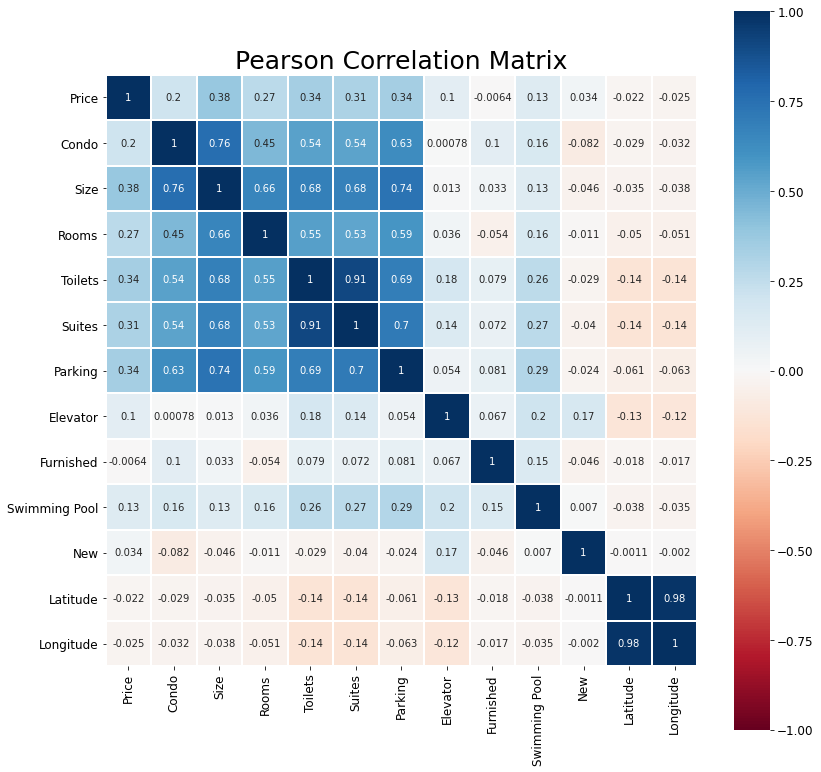

In [9]:
# Checking Out the Correlation Among Explanatory Variables
def plot_features_corr(df, figsize=(12, 12), cmap="RdBu", title='Pearson Correlation Matrix'):   
    df_corr = df.corr()
    plt.figure(figsize=figsize)
    plt.title(title, fontsize=25)
    sns.heatmap(df_corr, linewidths=0.25, vmax=1, vmin=-1, square=True, cmap=cmap,
                linecolor='w', annot=True, annot_kws={"size":10}, cbar_kws={"shrink": .9})
    plt.tight_layout()
    plt.show()

plot_features_corr(df[num_features])

The feature with the highest correlation with the price of the apartment is the size, followed by the number of toilets and parking (which are also correlated). <br/>
The features which are more correlated are the number of toilets and the number of suites, followed by (size-condo) and (size-parking). <br/>
Latitude and Longitude are also highly correlated.

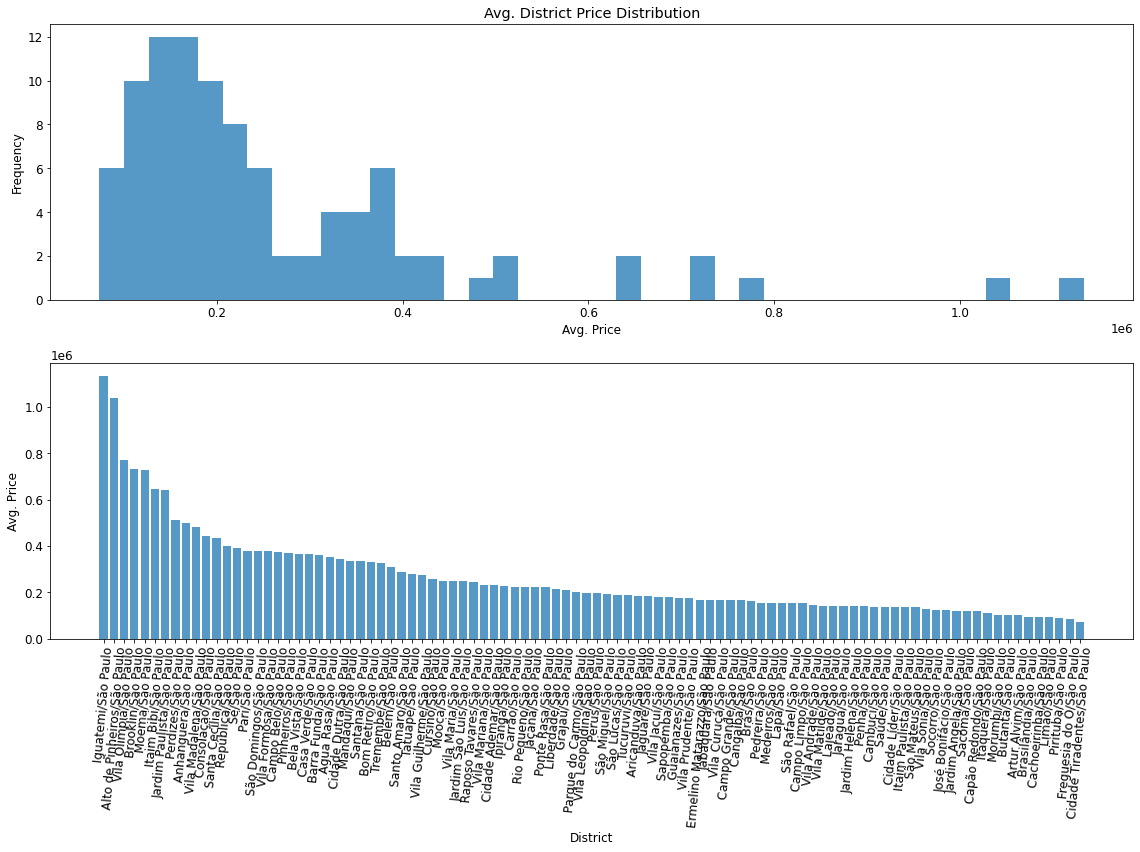

In [10]:
# Getting the average price per district
avg_district_price = df.groupby(by='District').mean().sort_values(by='Price', ascending=False)['Price']

plt.figure(figsize=(16, 12))
plt.subplot(2,1,1)
plt.title('Avg. District Price Distribution')
plt.hist(avg_district_price, bins=40, alpha=0.75)
plt.xlabel('Avg. Price')
plt.ylabel('Frequency')
plt.subplot(2,1,2)
x_ticks = np.arange(0, avg_district_price.shape[0], 1)
plt.bar(x_ticks, avg_district_price.values, alpha=0.75)
plt.xlabel('District')
plt.ylabel('Avg. Price')
plt.xticks(x_ticks, avg_district_price.index, rotation=85)
plt.tight_layout()
plt.show()

Iguatemi and Alto de Pinheiros have the highest prices, while Freguesia do O and Codade Tiradentes have the lowest average prices.

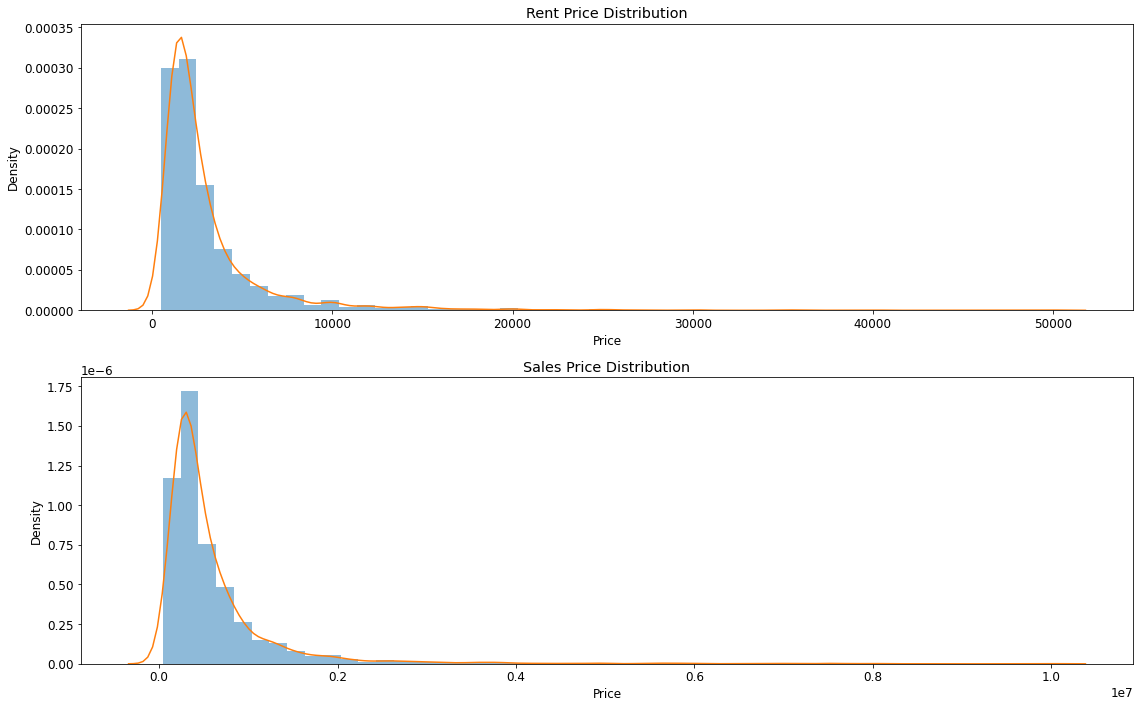

In [11]:
# Analyzing the price distribution by negotiation type
df_rent = df[df['Negotiation Type'] == 'rent']
df_sale = df[df['Negotiation Type'] == 'sale']

plt.figure(figsize=(16, 10))
plt.subplot(2,1,1)
plt.title('Rent Price Distribution')
plt.hist(df_rent['Price'], bins=50, density=True, alpha=0.5)
sns.kdeplot(data=df_rent, x="Price")
plt.subplot(2,1,2)
plt.title('Sales Price Distribution')
plt.hist(df_sale['Price'], bins=50, density=True, alpha=0.5)
sns.kdeplot(data=df_sale, x="Price")
plt.tight_layout()
plt.show()

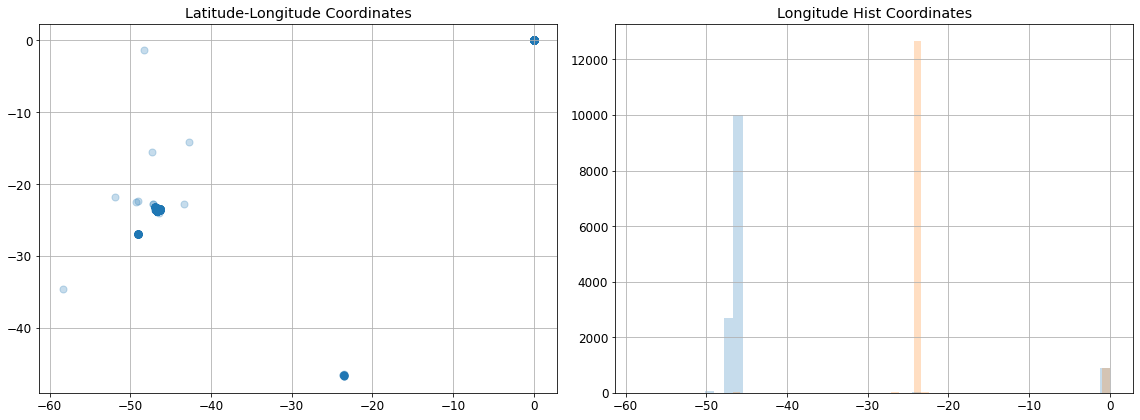

In [12]:
# Plotting the coordinates:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.title("Latitude-Longitude Coordinates")
plt.scatter(df['Longitude'], df['Latitude'], s=50, alpha=0.25)
plt.grid()

plt.subplot(1,2,2)
plt.title("Longitude Hist Coordinates")
plt.hist(df['Longitude'], bins=50, alpha=0.25, label='Longitude')
plt.hist(df['Latitude'], bins=50, alpha=0.25, label='Latitude')
plt.grid()

plt.tight_layout()
plt.show()

Since all the apartments are expected to be from São Paulo, we don't expect high variances in the latitude and longitude values. <br/>
From the graphs above we see some outliers. In the sequence, we see somes samples in the map.

In [13]:
def plot_apartment_locations(df_locations, n_samples=300, zoom_start=11):
    geolocator = Nominatim(user_agent='geopy-application')
    location_start = geolocator.geocode('São Paulo')
    map_ = folium.Map(location=(location_start.latitude, location_start.longitude), zoom_start=zoom_start)
    
    idxs_select = np.random.choice(df_locations.index, n_samples)
    for idx in idxs_select:
        location = (df_locations.loc[idx, 'Latitude'], df_locations.loc[idx, 'Longitude'])
        folium.Marker(location=location,).add_to(map_)

    return map_

plot_apartment_locations(df, zoom_start=10)

As expected, most of the apartments are located in Sao Paulo. <br/>
Bellow, with a different zoom value, we can see some markers in unexpected locations, like in the (0,0) spot, which is clearly wrong. <br/>

In [14]:
plot_apartment_locations(df, zoom_start=3)

# Data Preparation

In [15]:
# Useful variables:
Y_TARGET = 'Price'

In [16]:
# Dropping all the rent samples:
df = df[df['Negotiation Type'] == 'sale']

Since, rent prices and sales prices are part of different problems/contexts, only sales prices will be considered in this project. <br/>
A different model should be implemented for each negotiation type.

In [17]:
# Drop duplicates
df_no_duplicates = df.drop_duplicates()

print('Original data:', df.shape[0], 'samples -',
      df.shape[0]-df_no_duplicates.shape[0], 'duplicated samples were found.')

df = df_no_duplicates

Original data: 6412 samples - 110 duplicated samples were found.


In [18]:
# Splitting the data into train and test:
df_train, df_test = train_test_split(df,train_size=0.8, random_state=42)

Since, many coordinates values are wrong, latitude and longitude values will not be used. <br/>
In order to get some feeling about the geographic location, a new feature will be created with the district class according to the average district price.

In [19]:
# Creating the district_class feature:
avg_district_price_ = df.groupby(by='District').mean().sort_values(by='Price')['Price']
avg_district_price_


def create_district_class(df, avg_district_price):
    df['district_class'] = ''
    for dist,value in zip(avg_district_price.index, avg_district_price.values):
        if value >= 0.8*avg_district_price.max():
            dist_class = 'A'
        elif (value >= 0.6*avg_district_price.max()) and (value < 0.8*avg_district_price.max()):
            dist_class = 'B'
        elif (value >= 0.4*avg_district_price.max()) and (value < 0.6*avg_district_price.max()):
            dist_class = 'C'
        elif (value >= 0.2*avg_district_price.max()) and (value < 0.4*avg_district_price.max()):
            dist_class = 'D'
        else: # value < 0.2*avg_district_price.max()
            dist_class = 'E'
        df['district_class'][df['District'] == dist] = dist_class
        
    return df['district_class'].values       
    

df_train['district_class'] = create_district_class(df_train, avg_district_price_)
df_test['district_class'] = create_district_class(df_test, avg_district_price_)

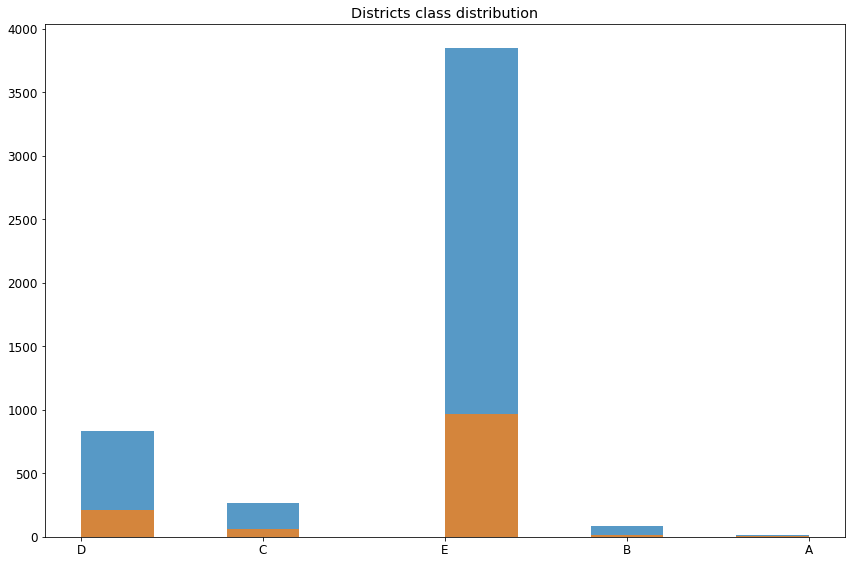

In [20]:
# district_class distribution
plt.figure(figsize=(12, 8))
plt.title('Districts class distribution')
plt.hist(df_train['district_class'], alpha=0.75)
plt.hist(df_test['district_class'], alpha=0.75)
plt.tight_layout()
plt.show()

In [21]:
# Splitting X and y:
y_train = df_train[Y_TARGET]
X_train = df_train.drop(columns=[Y_TARGET])

y_test = df_test[Y_TARGET]
X_test = df_test.drop(columns=[Y_TARGET])

## Preprocessing

In [22]:
# Listing all the features by type
numeric_cols = ['Size', 'Condo', 'Rooms', 'Toilets', 'Suites', 'Parking',
               ]
boolean_cols = ['Elevator', 'Furnished', 'Swimming Pool', 'New',
               ]
categoric_cols = ['district_class',
                 ]


print(len(numeric_cols + boolean_cols + categoric_cols), 'features selected')

11 features selected


In call cases a SimpleImputer will e used in order to avoid any possibility of breaking the model in case a null value aappears. <br/>
For the numeric columns a MinMaxScaler will be used in order to scale all the features to 0~1 range, the boolean cols are already in the same range. <br/>
For the categorical columns, the OneHotEncoder will be used.

In [23]:
# Features encoding
features_encoder = ColumnTransformer([("numeric cols", Pipeline([('num imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)),
                                                                 ('num scaling', MinMaxScaler()),
                                                                ]), numeric_cols),
                                      ("boolean cols", Pipeline([('bool imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)),
                                                                ]), boolean_cols),
                                      ("categoric cols", Pipeline([('cat imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)),
                                                                   ('cat one-hot encoder', OneHotEncoder(handle_unknown='ignore')),
                                                                ]), categoric_cols),
                                     ], remainder='drop')

In [24]:
# Features selection
features_selector = VarianceThreshold(threshold=0)

In [25]:
# Features creation
features_creator = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [26]:
# Pre-processing pipeline:
preprocessor_lin = Pipeline([('features encoding', features_encoder),
                             ('features selection', features_selector),
                            ])

In [27]:
# Pre-processing pipeline:
preprocessor_poly = Pipeline([('features encoding', features_encoder),
                              ('features selection', features_selector),
                              ('features creation', features_creator),
                             ])

Two pre-processing pipelines were created with different stages:
- 1: Features encoding + features selection (by variance threshold)
- 2: Features encoding + features selection (by variance threshold) + polynomial combination of the features (degree: 2)

In [28]:
# Encoding the data
X_train_lin = preprocessor_lin.fit_transform(X_train, y_train)
pd.DataFrame(X_train_lin)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.008475,0.033632,0.00,0.166667,0.25,0.142857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.093220,0.095291,0.00,0.166667,0.25,0.285714,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.152542,0.237108,0.25,0.333333,0.50,0.285714,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.033898,0.031390,0.25,0.000000,0.00,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.044068,0.039238,0.25,0.166667,0.25,0.142857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,0.138983,0.067265,0.50,0.000000,0.00,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5037,0.030508,0.031390,0.25,0.000000,0.00,0.142857,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5038,0.003390,0.008969,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5039,0.020339,0.000000,0.00,0.000000,0.00,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
X_train_poly = preprocessor_poly.fit_transform(X_train, y_train)
pd.DataFrame(X_train_poly)

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.008475,0.033632,0.00,0.166667,0.25,0.142857,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.093220,0.095291,0.00,0.166667,0.25,0.285714,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.152542,0.237108,0.25,0.333333,0.50,0.285714,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.033898,0.031390,0.25,0.000000,0.00,0.142857,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.044068,0.039238,0.25,0.166667,0.25,0.142857,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,0.138983,0.067265,0.50,0.000000,0.00,0.142857,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5037,0.030508,0.031390,0.25,0.000000,0.00,0.142857,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5038,0.003390,0.008969,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5039,0.020339,0.000000,0.00,0.000000,0.00,0.142857,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X_test_lin = preprocessor_lin.transform(X_test)
pd.DataFrame(X_test_lin)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.015254,0.000000,0.25,0.166667,0.25,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.033898,0.031726,0.25,0.166667,0.25,0.142857,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.028814,0.000000,0.25,0.166667,0.25,0.142857,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.033898,0.044843,0.25,0.000000,0.00,0.142857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.072881,0.051570,0.25,0.166667,0.25,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.089831,0.069955,0.50,0.333333,0.25,0.428571,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1257,0.222034,0.280269,0.75,0.666667,0.75,0.571429,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1258,0.086441,0.081839,0.50,0.166667,0.25,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1259,0.025424,0.000000,0.25,0.000000,0.00,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
X_test_poly = preprocessor_poly.transform(X_test)
pd.DataFrame(X_test_poly)

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.015254,0.000000,0.25,0.166667,0.25,0.142857,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.033898,0.031726,0.25,0.166667,0.25,0.142857,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.028814,0.000000,0.25,0.166667,0.25,0.142857,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.033898,0.044843,0.25,0.000000,0.00,0.142857,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.072881,0.051570,0.25,0.166667,0.25,0.142857,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.089831,0.069955,0.50,0.333333,0.25,0.428571,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1257,0.222034,0.280269,0.75,0.666667,0.75,0.571429,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1258,0.086441,0.081839,0.50,0.166667,0.25,0.285714,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1259,0.025424,0.000000,0.25,0.000000,0.00,0.142857,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Baseline Models

In [32]:
# Baseline lin
reg_lin = LinearRegression().fit(X_train_lin, y_train)

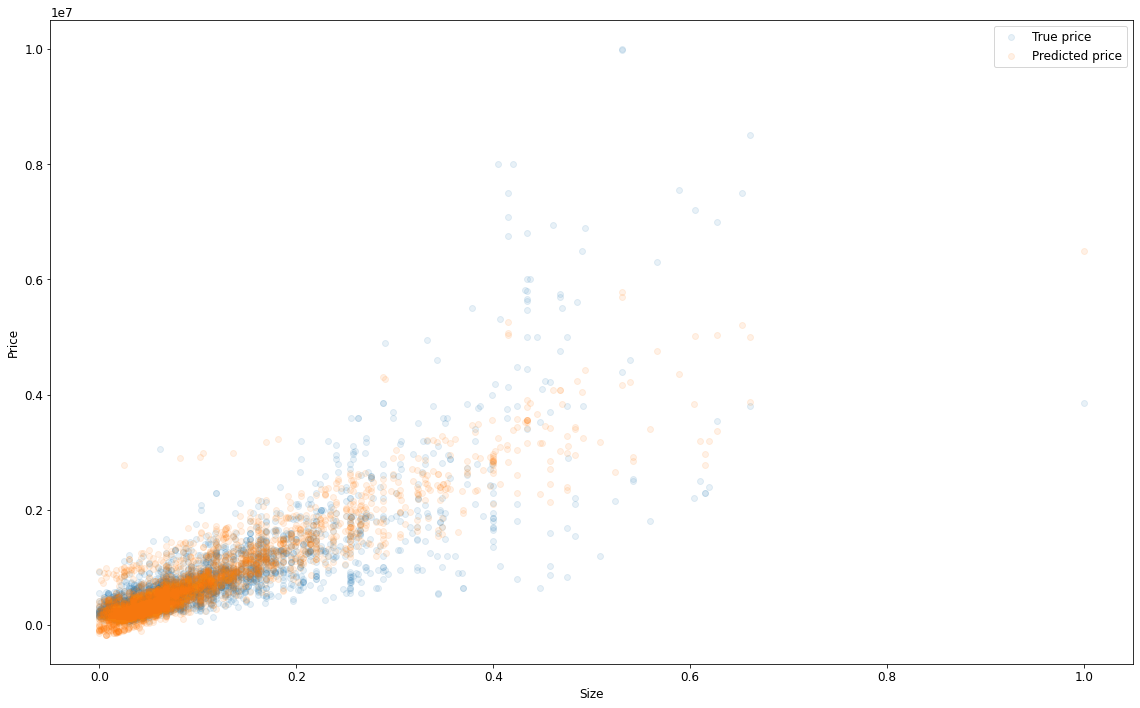

In [33]:
# Baseline basic evaluation:
def plot_scatter_pred(est, X_array, y_true, ylabel='Price', xlabel='Size', figsize=(16, 10)):
    plt.figure(figsize=figsize)
    y_pred = est.predict(X_array)
    plt.scatter(X_array[:, 0], y_true, alpha=0.1, label='True price')
    plt.scatter(X_array[:, 0], y_pred, alpha=0.1, label='Predicted price')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_scatter_pred(reg_lin, X_train_lin, y_train)

In [34]:
# Summaryze metrics lin:
y_pred_lin_train = reg_lin.predict(X_train_lin)
y_pred_lin_test = reg_lin.predict(X_test_lin)

train_metrics = {'Model/Stage': 'Train - Lin',
                 'r2_score': r2_score(y_train, y_pred_lin_train),
                 'MAE': mean_absolute_error(y_train, y_pred_lin_train),
                 'MSE': mean_squared_error(y_train, y_pred_lin_train),
                 'RMSE': mean_squared_error(y_train, y_pred_lin_train)**0.5,
                }
test_metrics = {'Model/Stage': 'Test - Lin',
                'r2_score': r2_score(y_test, y_pred_lin_test),
                'MAE': mean_absolute_error(y_test, y_pred_lin_test),
                'MSE': mean_squared_error(y_test, y_pred_lin_test),
                'RMSE': mean_squared_error(y_test, y_pred_lin_test)**0.5,
               }

baseline_metrics = []
baseline_metrics.append(train_metrics)
baseline_metrics.append(test_metrics)

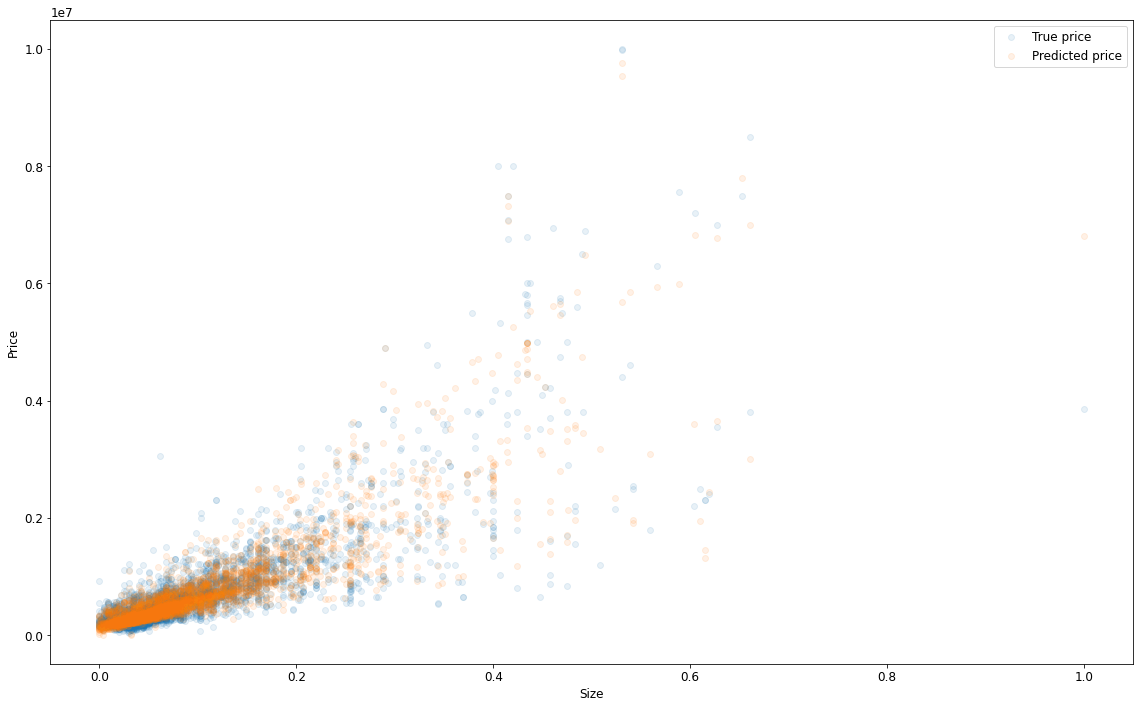

In [35]:
# Baseline poly
reg_poly = LinearRegression().fit(X_train_poly, y_train)

plot_scatter_pred(reg_poly, X_train_poly, y_train)

In [36]:
# Summaryze metrics poly:
y_pred_poly_train = reg_poly.predict(X_train_poly)
y_pred_poly_test = reg_poly.predict(X_test_poly)

train_metrics = {'Model/Stage': 'Train - Poly',
                 'r2_score': r2_score(y_train, y_pred_poly_train),
                 'MAE': mean_absolute_error(y_train, y_pred_poly_train),
                 'MSE': mean_squared_error(y_train, y_pred_poly_train),
                 'RMSE': mean_squared_error(y_train, y_pred_poly_train)**0.5,
                }
test_metrics = {'Model/Stage': 'Test - Poly',
                'r2_score': r2_score(y_test, y_pred_poly_test),
                'MAE': mean_absolute_error(y_test, y_pred_poly_test),
                'MSE': mean_squared_error(y_test, y_pred_poly_test),
                'RMSE': mean_squared_error(y_test, y_pred_poly_test)**0.5,
               }

baseline_metrics.append(train_metrics)
baseline_metrics.append(test_metrics)

In [37]:
# Baseline metrics
baseline_metrics = pd.DataFrame(baseline_metrics)
baseline_metrics

,Model/Stage,r2_score,MAE,MSE,RMSE
0,Train - Lin,0.795208,171309.051290,1.145501e+11,338452.549792
1,Test - Lin,0.773571,171179.056766,1.214723e+11,348528.805597
2,Train - Poly,0.897343,130322.594881,5.742128e+10,239627.368777
3,Test - Poly,0.835219,141339.685497,8.840008e+10,297321.507284


Two baselines were created (with and without adding polynomial combination of the features). <br/>
The creation of new features by polynomial combination significantly improved the performance, while considering the same ML technique (linear model).

## Enhanced Models Training and Validation

Some advanced models will be trained considering the poly features:
- Random Forest Regressor
- KNN Regressor
- SVR Regressor
- MLP Regressor

In [38]:
# Training settings:
n_jobs = 4
n_iter = 100
scoring = 'neg_root_mean_squared_error'

X_train_ = X_train_poly
y_train_ = y_train

In [39]:
# RandomForest:
param_grid = {'n_estimators': [1, 5, 10, 50, 100],
              'criterion': ["squared_error", "mse", "absolute_error", "poisson"],
              'max_depth': [3, 5, 10, 20],
              'max_features': [3, 5, 8, 10, "auto", "sqrt", "log2"],
             }

rf_regr = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_grid, n_iter=n_iter,
                             scoring=scoring, n_jobs=n_jobs, verbose=1, random_state=42)
rf_regr.fit(X_train_, y_train_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=100, n_jobs=4,
                   param_distributions={'criterion': ['squared_error', 'mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [3, 5, 10, 20],
                                        'max_features': [3, 5, 8, 10, 'auto',
                                                         'sqrt', 'log2'],
                                        'n_estimators': [1, 5, 10, 50, 100]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [40]:
# KNeighbors:
param_grid = {'n_neighbors': [1, 3, 5, 10],
              'weights': ["uniform", "distance"],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [3, 5, 8, 10, 20, 30, 40],
             }

knn_regr = RandomizedSearchCV(KNeighborsRegressor(), param_distributions=param_grid, n_iter=n_iter,
                             scoring=scoring, n_jobs=n_jobs, verbose=1, random_state=42)
knn_regr.fit(X_train_, y_train_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=KNeighborsRegressor(), n_iter=100, n_jobs=4,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [3, 5, 8, 10, 20, 30, 40],
                                        'n_neighbors': [1, 3, 5, 10],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [41]:
# SVR:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': [1, 2, 3, 4, 5],
             }

svm_regr = RandomizedSearchCV(SVR(), param_distributions=param_grid, n_iter=n_iter,
                             scoring=scoring, n_jobs=n_jobs, verbose=1, random_state=42)
svm_regr.fit(X_train_, y_train_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=SVR(), n_iter=100, n_jobs=4,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [42]:
# MLP:
param_grid = {'hidden_layer_sizes': [4, 8, 16, 32, 64],
              'activation': ['identity', 'logistic', 'tanh'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'alpha': [1e-5, 1e-4, 1e-3, 1e-2],
              'learning_rate': ['constant', 'invscaling', 'adaptive'],
             }

mlp_regr = RandomizedSearchCV(MLPRegressor(), param_distributions=param_grid, n_iter=n_iter,
                              scoring=scoring, n_jobs=n_jobs, verbose=1, random_state=42)
mlp_regr.fit(X_train_, y_train_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=MLPRegressor(), n_iter=100, n_jobs=4,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh'],
                                        'alpha': [1e-05, 0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [4, 8, 16, 32,
                                                               64],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In the sequence, the performance of all the hyperparameters combinations is summaryzed:

In [43]:
def plot_estimators_cvperf(estimators_list, figsize=(12, 6), error_metric=''):
    data = [pd.DataFrame(estimator.cv_results_)['mean_test_score'].dropna().values for estimator in estimators_list]
    estimator_names = [str(estimator.estimator).replace('()', '') for estimator in estimators_list]
        
    plt.figure(figsize=figsize)
    plt.title('Model(s) CV performance')
    plt.boxplot(data)
    plt.xticks([i+1 for i in range(len(estimator_names))], estimator_names)
    plt.xlabel('model techniques')
    plt.ylabel(error_metric)
    plt.tight_layout()
    plt.show()

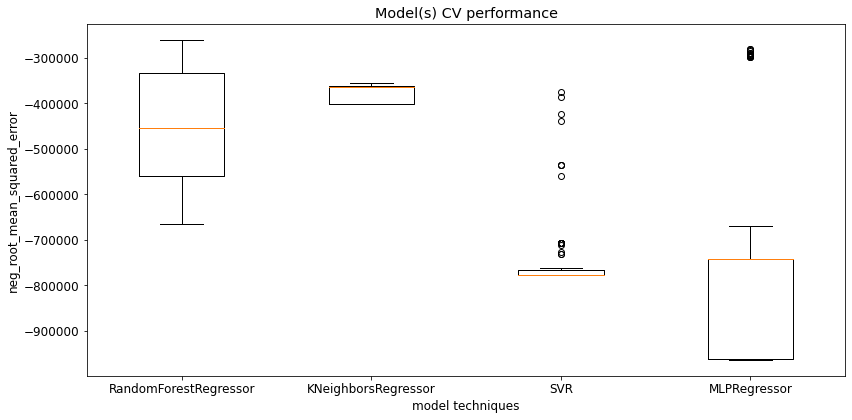

In [44]:
estimators_list = [rf_regr, knn_regr, svm_regr, mlp_regr]
plot_estimators_cvperf(estimators_list, error_metric=scoring)

This is an important graph, each boxplot representes all the hyperparameters combinations fo one technique.
In the y axis, we show the mean value of the error metric used for comparison between all cross-validation values.
With this plot we can analyse which technique had the best performance by:
- Considering which technique had the lowest error of all
- Also, we can compare the erros distribution for each different technique.

The main regression metrics are shown bellow, for the best estimator of each technique.

In [45]:
def get_model_metrics(estimators_list, estimator_names, stage='Train'):
    model_metrics = []
    for est,est_name in zip(estimators_list, estimator_names):
        y_pred_poly_train = est.predict(X_train_poly)
        y_pred_poly_test = est.predict(X_test_poly)

        train_metrics = {'Model/Stage': f"{stage} - {est_name}",
                         'r2_score': r2_score(y_train, y_pred_poly_train),
                         'MAE': mean_absolute_error(y_train, y_pred_poly_train),
                         'MSE': mean_squared_error(y_train, y_pred_poly_train),
                         'RMSE': mean_squared_error(y_train, y_pred_poly_train)**0.5,
                        }
        model_metrics.append(train_metrics)
    return pd.DataFrame(model_metrics)

best_estimators = [est.best_estimator_ for est in estimators_list]
est_names = [str(est.estimator).replace('()', '') for est in estimators_list]
model_metrics = get_model_metrics(best_estimators, est_names)
model_metrics

,Model/Stage,r2_score,MAE,MSE,RMSE
0,Train - RandomForestRegressor,0.983336,50947.149981,9.320717e+09,96543.862995
1,Train - KNeighborsRegressor,0.998969,4457.271209,5.765366e+08,24011.177282
2,Train - SVR,0.895217,117798.449175,5.861032e+10,242095.677218
3,Train - MLPRegressor,0.889585,134210.556690,6.176054e+10,248516.676973


However, the best estimator is chosen as the best mean score considering the cross-validation made by the RandomizedSearchCV. <br/>
After selecting the best hyperparameters set, the model is trained considering all the data available for training.

In [46]:
model = estimators_list[np.argmax([pd.DataFrame(m.cv_results_)['mean_test_score'].dropna().max() for m in estimators_list])].best_estimator_
model.fit(X_train_, y_train)

RandomForestRegressor(max_depth=20, max_features=10)

## Conclusion

In [47]:
# Final model performance on the test dataset
model_metrics_final = get_model_metrics(estimators_list=[model], estimator_names=[str(model).split('(')[0]], stage='Test')
model_metrics_final

,Model/Stage,r2_score,MAE,MSE,RMSE
0,Test - RandomForestRegressor,0.981883,51752.984643,1.013370e+10,100666.280385


In [48]:
baseline_metrics

,Model/Stage,r2_score,MAE,MSE,RMSE
0,Train - Lin,0.795208,171309.051290,1.145501e+11,338452.549792
1,Test - Lin,0.773571,171179.056766,1.214723e+11,348528.805597
2,Train - Poly,0.897343,130322.594881,5.742128e+10,239627.368777
3,Test - Poly,0.835219,141339.685497,8.840008e+10,297321.507284


The performance of the best model, in the test dataset is shown here. It's possible to see a clear evolutiom on the metrics.

When considering the real-estate business, it's important to have some accurate predictions of the apartment prices. <br/>
A model with this capability could be used for giving a first evaluation on some properties, which could be reviewed by some business analyst.
Also, despite some upgrades compared to the baseline, our model can still be improved a lot by:
- New features like the age of the properties;
- Improvement in the GPS coordinates and creation of better features associated with location;
- Or simply collecting more data.
- Some features related to the street where the propety is located: presencc of hospitals, cemeteries nearby, etc.